Tensorflow CPU vs GPU performance test

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time

We set the training data that we are going to use.

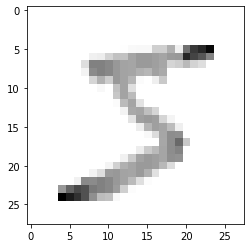

In [49]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

We run the cpu training and calculate the time taken.

In [52]:
with tf.device('/cpu:0'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    start = time()
    model.fit(x_train, y_train, epochs=10)
    print(time()-start)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3459 - accuracy: 0.8956
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0791 - accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0159 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0130 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.013

We run the gpu training and calculate the time taken.

In [51]:
with tf.device('/gpu:0'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    start = time()
    model.fit(x_train, y_train, epochs=10)
    print(time()-start)

Epoch 1/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.3407 - accuracy: 0.8997
Epoch 2/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.0811 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.0476 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.0346 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.0262 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.0208 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0174 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.0138 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.0134 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 2s 892u

From the results we can see that the gpu training time is faster than the cpu training time.